In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statistics as stat
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load file of Automobile_insurance_fraud using pandas
df=pd.read_csv(r"C:\Users\balar\Downloads\Automobile_insurance_fraud.csv")

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
#getting whole information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
#description of this data
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
#size of dataframe
df.size

40000

In [7]:
#dimension of dataframe
df.ndim

2

In [8]:
# drop the column which does not have any data
df.drop("_c39",axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
#finding memory usage of dataframe
df.memory_usage(deep=True)

Index                            128
months_as_customer              8000
age                             8000
policy_number                   8000
policy_bind_date               67000
policy_state                   59000
policy_csl                     64300
policy_deductable               8000
policy_annual_premium           8000
umbrella_limit                  8000
insured_zip                     8000
insured_sex                    62074
insured_education_level        62905
insured_occupation             70521
insured_hobbies                65113
insured_relationship           66466
capital-gains                   8000
capital-loss                    8000
incident_date                  67000
incident_type                  78371
collision_type                 68940
incident_severity              68620
authorities_contacted          62762
incident_state                 59000
incident_city                  66287
incident_location              71749
incident_hour_of_the_day        8000
n

In [11]:
# policy_bind_date,incident_date these columns data type are object so we can convert it into int64
import datetime as dt

In [12]:
df["policy_bind_date"]=pd.to_datetime(df["policy_bind_date"])
df["incident_date"]=pd.to_datetime(df["policy_bind_date"])


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   object        
 5   policy_csl                   1000 non-null   object        
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   object        
 11  insured_education_level      1000 non-null  

In [14]:
#finding unique values in the data
df.nunique().to_frame('no of unique values')

,no of unique values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


In [15]:
#droping column which has unneccesary data

df.drop("policy_number",axis=1,inplace=True)
df.drop("incident_location",axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_csl                   1000 non-null   object        
 5   policy_deductable            1000 non-null   int64         
 6   policy_annual_premium        1000 non-null   float64       
 7   umbrella_limit               1000 non-null   int64         
 8   insured_zip                  1000 non-null   int64         
 9   insured_sex                  1000 non-null   object        
 10  insured_education_level      1000 non-null   object        
 11  insured_occupation           1000 non-null  

In [17]:
# checking null values in data
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [18]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [19]:
df.columns #getting all columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported'],
      dtype='object')

In [20]:
# creating seperate column for day,month,year
df['policy_bind_day']=df['policy_bind_date'].dt.day
df['policy_bind_month']=df['policy_bind_date'].dt.month
df['policy_bind_year']=df['policy_bind_date'].dt.year
df['incident_day']=df['incident_date'].dt.day
df['incident_month']=df['incident_date'].dt.month
df['incident_year']=df['incident_date'].dt.year

In [21]:
df #checking the columns

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_make,auto_model,auto_year,fraud_reported,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,Saab,92x,2004,Y,17,10,2014,17,10,2014
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,Mercedes,E400,2007,Y,27,6,2006,27,6,2006
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,Dodge,RAM,2007,N,9,6,2000,9,6,2000
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Chevrolet,Tahoe,2014,Y,25,5,1990,25,5,1990
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,Accura,RSX,2009,N,6,6,2014,6,6,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,Honda,Accord,2006,N,16,7,1991,16,7,1991
996,285,41,2014-05-01,IL,100/300,1000,1436.79,0,608177,FEMALE,...,Volkswagen,Passat,2015,N,1,5,2014,1,5,2014
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,Suburu,Impreza,1996,N,17,2,2003,17,2,2003
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,Audi,A5,1998,N,18,11,2011,18,11,2011


In [22]:
df['incident_date'].value_counts() # value count is use to count each an every value of the the columns

2006-01-01    3
1992-04-28    3
1992-05-08    3
1991-12-14    2
2004-09-08    2
             ..
2014-03-06    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: incident_date, Length: 951, dtype: int64

In [23]:
#now droping the column which are not useful about date.because we have created seperate coumn for that.
df.drop('incident_date',axis=1,inplace=True)

In [24]:
df.drop('policy_bind_day',axis=1,inplace=True)

In [25]:
# null value finding
df.isnull().any()

months_as_customer             False
age                            False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                 False
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                False
bodily_injuries                False
witnesses                      False
p

In [26]:
df.isnull().any().sum()

0

<AxesSubplot:>

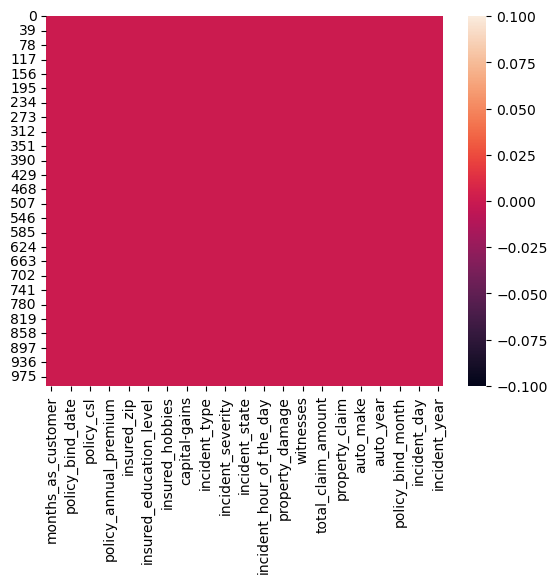

In [27]:
#finding null by heatmap
sns.heatmap(df.isnull()) # it has no null value ,if coul it present,it my be indicate with white line

In [28]:
# counting values of every column using loop.
for i in df.columns:
    print(df[i].value_counts())
    print(":"*50)

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
::::::::::::::::::::::::::::::::::::::::::::::::::
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
::::::::::::::::::::::::::::::::::::::::::::::::::
2006-01-01    3
1992-04-28    3
1992-05-08    3
1991-12-14    2
2004-09-08    2
             ..
2014-03-06    1
1998-12-12    1
1999-02-18    1
1997-10-30    1
1996-11-11    1
Name: policy_bind_date, Length: 951, dtype: int64
::::::::::::::::::::::::::::::::::::::::::::::::::
OH    352
IL    338
IN    310
Na

In [29]:
# umbrella_limit-0-798
# capital-gains-0-508
#capital-loss-0-475
#collision_type-?-178
#property_damage-?-360
#bodily_injuries-0-340
#police_report_available-?-343

In [30]:
#df[df.columns[df(df=='?').any()]]

In [31]:
df["collision_type"].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [32]:
#finding mode
df["collision_type"].mode()

0    Rear Collision
Name: collision_type, dtype: object

In [33]:
#replacing ? by Rear Collision
df["collision_type"].replace("?","Rear Collision",inplace=True)

In [34]:
#checking weather it replace or not
df["collision_type"].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'fraud_reported'}, xlabel='fraud_reported', ylabel='count'>

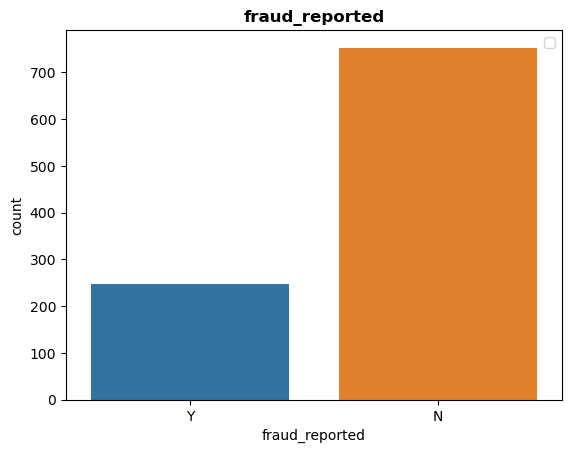

In [35]:
x=df['fraud_reported']
plt.title("fraud_reported",fontweight='bold')
plt.legend()
sns.countplot(x)

<AxesSubplot:ylabel='fraud_reported'>

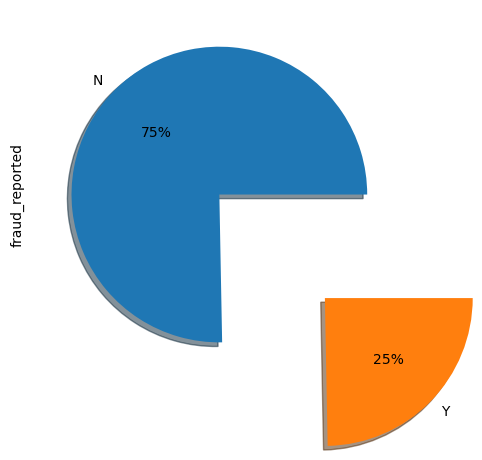

In [36]:
df['fraud_reported'].value_counts()[:].plot(kind='pie',autopct="%1.0f%%",shadow=True,explode=[0,1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'fraud_reported'}, xlabel='fraud_reported', ylabel='Count'>

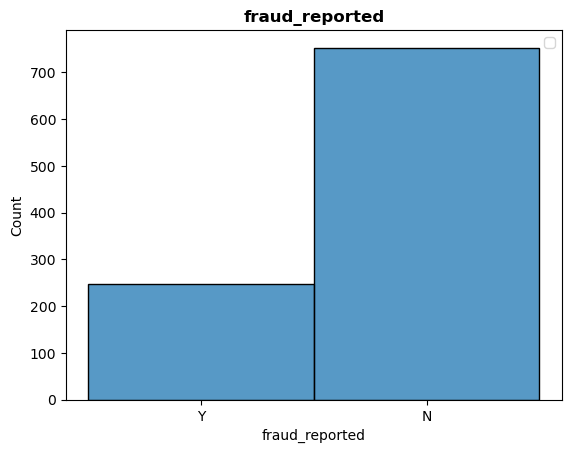

In [37]:
x=df['fraud_reported']
plt.title("fraud_reported",fontweight='bold')
plt.legend()
sns.histplot(x)

In [38]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [39]:
df['property_damage'].str.replace('?','NO') # ? is replace by NO value

0      YES
1       NO
2       NO
3       NO
4       NO
      ... 
995    YES
996    YES
997     NO
998     NO
999     NO
Name: property_damage, Length: 1000, dtype: object

In [40]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [41]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [42]:
df['police_report_available'].replace("?","NO",inplace=True)

In [43]:
df['police_report_available'].value_counts()

NO     686
YES    314
Name: police_report_available, dtype: int64

In [44]:
df.dtypes

months_as_customer                      int64
age                                     int64
policy_bind_date               datetime64[ns]
policy_state                           object
policy_csl                             object
policy_deductable                       int64
policy_annual_premium                 float64
umbrella_limit                          int64
insured_zip                             int64
insured_sex                            object
insured_education_level                object
insured_occupation                     object
insured_hobbies                        object
insured_relationship                   object
capital-gains                           int64
capital-loss                            int64
incident_type                          object
collision_type                         object
incident_severity                      object
authorities_contacted                  object
incident_state                         object
incident_city                     

In [45]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [46]:
df['csl_per_person']=df['policy_csl'].str.split("/",expand=True)[0]

In [47]:
df['csl_per_policy']=df['policy_csl'].str.split("/",expand=True)[1]

In [48]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_model,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year,csl_per_person,csl_per_policy
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,92x,2004,Y,10,2014,17,10,2014,250,500
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,E400,2007,Y,6,2006,27,6,2006,250,500
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,RAM,2007,N,6,2000,9,6,2000,100,300
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,Tahoe,2014,Y,5,1990,25,5,1990,250,500
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,RSX,2009,N,6,2014,6,6,2014,500,1000


In [49]:
df['vehicle_age']=2023-df['auto_year']

In [50]:
df.head()

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,auto_year,fraud_reported,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year,csl_per_person,csl_per_policy,vehicle_age
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,2004,Y,10,2014,17,10,2014,250,500,19
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,2007,Y,6,2006,27,6,2006,250,500,16
2,134,29,2000-06-09,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2007,N,6,2000,9,6,2000,100,300,16
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,2014,Y,5,1990,25,5,1990,250,500,9
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,2009,N,6,2014,6,6,2014,500,1000,14


In [51]:
df.drop(['auto_year','policy_csl'],axis=1,inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_deductable            1000 non-null   int64         
 5   policy_annual_premium        1000 non-null   float64       
 6   umbrella_limit               1000 non-null   int64         
 7   insured_zip                  1000 non-null   int64         
 8   insured_sex                  1000 non-null   object        
 9   insured_education_level      1000 non-null   object        
 10  insured_occupation           1000 non-null   object        
 11  insured_hobbies              1000 non-null  

In [53]:
df.drop(['umbrella_limit','capital-gains'],axis=1,inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_bind_date             1000 non-null   datetime64[ns]
 3   policy_state                 1000 non-null   object        
 4   policy_deductable            1000 non-null   int64         
 5   policy_annual_premium        1000 non-null   float64       
 6   insured_zip                  1000 non-null   int64         
 7   insured_sex                  1000 non-null   object        
 8   insured_education_level      1000 non-null   object        
 9   insured_occupation           1000 non-null   object        
 10  insured_hobbies              1000 non-null   object        
 11  insured_relationship         1000 non-null  

In [55]:
df.nunique().to_frame("no of unique value")

,no of unique value
months_as_customer,391
age,46
policy_bind_date,951
policy_state,3
policy_deductable,3
policy_annual_premium,991
insured_zip,995
insured_sex,2
insured_education_level,7
insured_occupation,14


In [56]:
#seperating the columns in categorical and numerical dtypes
catcol=[]
numcol=[]
for i in df.dtypes.index:
    if (df.dtypes[i]=='object'):
        catcol.append(i)
    else:
        numcol.append(i)

In [57]:
catcol

['policy_state',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'fraud_reported',
 'csl_per_person',
 'csl_per_policy']

In [58]:
numcol

['months_as_customer',
 'age',
 'policy_bind_date',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month',
 'incident_year',
 'vehicle_age']

In [59]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,insured_zip,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_bind_month,policy_bind_year,incident_day,incident_month,incident_year,vehicle_age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,501214.488000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,6.559000,2001.604000,15.448000,6.559000,2001.604000,17.897000
std,115.113174,9.140287,611.864673,244.167395,71701.610941,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,3.391758,7.360391,8.850176,3.391758,7.360391,6.015861
min,0.000000,19.000000,500.000000,433.330000,430104.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1.000000,1990.000000,1.000000,1.000000,1990.000000,8.000000
25%,115.750000,32.000000,500.000000,1089.607500,448404.500000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,4.000000,1995.000000,8.000000,4.000000,1995.000000,13.000000
50%,199.500000,38.000000,1000.000000,1257.200000,466445.500000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,2002.000000,16.000000,7.000000,2002.000000,18.000000
75%,276.250000,44.000000,2000.000000,1415.695000,603251.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,9.000000,2008.000000,23.000000,9.000000,2008.000000,23.000000
max,479.000000,64.000000,2000.000000,2047.590000,620962.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,12.000000,2015.000000,31.000000,12.000000,2015.000000,28.000000


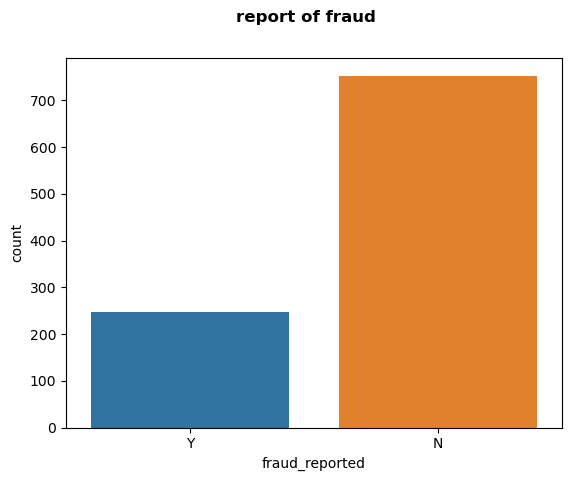

In [60]:
#visualization
#univariate
sns.countplot(df['fraud_reported'])
plt.suptitle("report of fraud",fontweight='bold')
plt.show()

<AxesSubplot:ylabel='auto_make'>

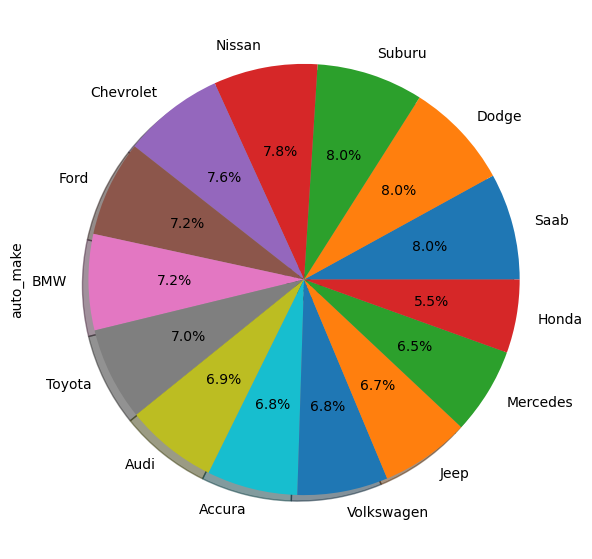

In [61]:
plt.figure(figsize=(10,7))
df['auto_make'].value_counts()[:].plot(kind='pie',autopct="%1.1f%%",shadow=True)

<AxesSubplot:xlabel='property_claim', ylabel='vehicle_claim'>

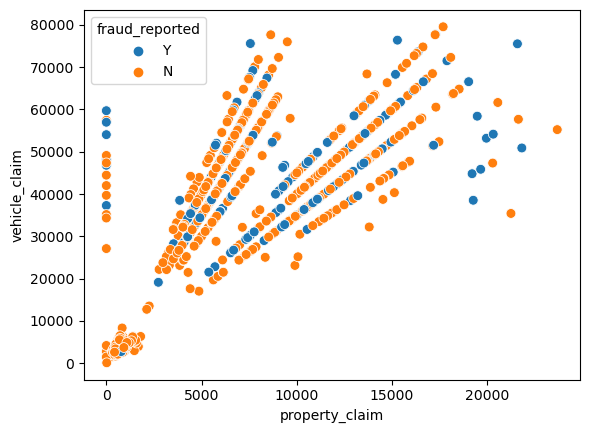

In [62]:
#bivariate analysis
sns.scatterplot(df['property_claim'],df['vehicle_claim'],hue=df['fraud_reported'],s=50,cmap='tab20')

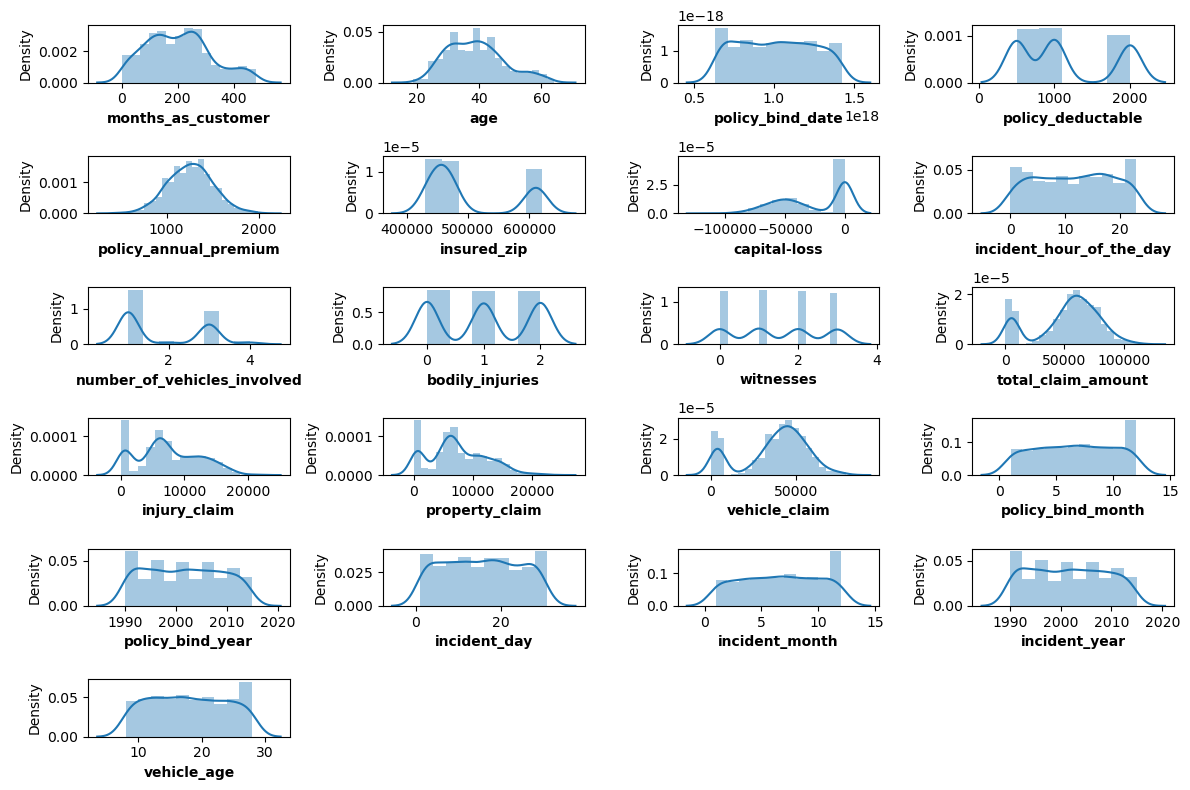

In [63]:
#checking skewness of plot

plt.figure(figsize=(12,8))
pltn=1
for i in numcol:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=10,fontweight='bold')
    pltn=pltn+1
    plt.tight_layout()
    


In [64]:
numcol

['months_as_customer',
 'age',
 'policy_bind_date',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month',
 'incident_year',
 'vehicle_age']

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = ['months_as_customer',
 'age',
 'policy_bind_date',
 'policy_deductable',
 'policy_annual_premium',
 'insured_zip',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'policy_bind_month',
 'policy_bind_year',
 'incident_day',
 'incident_month',
 'incident_year',
 'vehicle_age']

fig,axes = plt.subplots(nrows=len(numeric_columns), figsize=(22, 16 * len(numeric_columns)))

for i, column in enumerate(numeric_columns):
    sns.boxplot(data=df, ax=axes[i])
    axes[i].set_title(column)
    


plt.tight_layout()


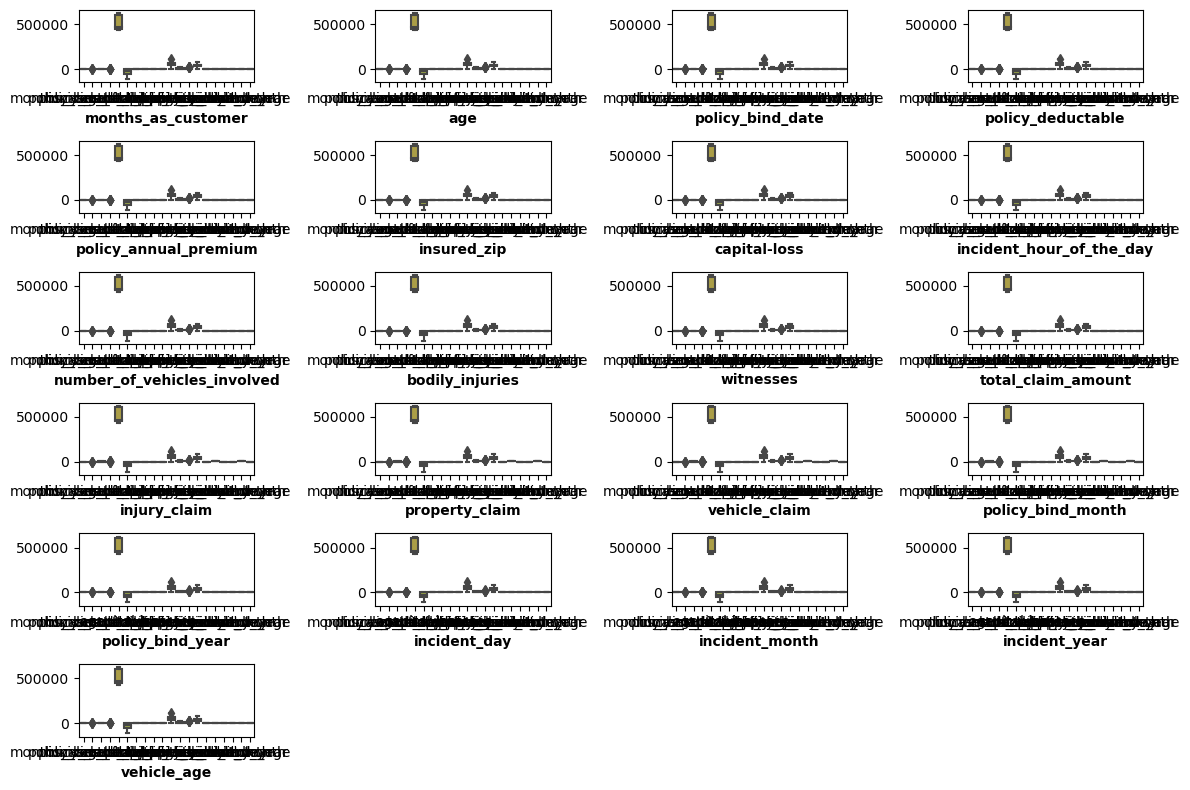

In [66]:
plt.figure(figsize=(12,8))
pltn=1
for i in numcol:
    if pltn<=23:
        ax=plt.subplot(6,4,pltn)
        sns.boxplot(data=df)
        plt.xlabel(i,fontsize=10,fontweight='bold')
    pltn=pltn+1
    plt.tight_layout()
    
    